## Part 1. Description of more realistic dataset

Written by Sundong Kim (sundong.kim@kaist.ac.kr), Jan 11th, 2019,

In this notebook, we introduce the description of our more realistic benchmark dataset.

* First, we briefly introduce how to generate the new dataset.
    * Step 1: http://143.248.84.89:8888/notebooks/revisit/notebook_prepare_open_dataset/Preparing-open-dataset_step1_store_A.ipynb
    * Step 2: http://143.248.84.89:8888/notebooks/revisit/notebook_prepare_open_dataset/Preparing-open-dataset_step2_store_A.ipynb
* Second, we show brief statistics of the new dataset.
* Third, we show the difference between train/test ratio of our old dataset and our new dataset and compare between two dataset according to realistic prediction setting.

In [13]:
import pandas as pd
import numpy as np
import os
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
# In this tutorial, we will use a store_C dataset.      # /data: 50,000 user dataset  /data_sample: 500 user sample dataset
pre_release_path = '../data/indoor/store_C/'

# Load dataset
train_labels = pd.read_csv(pre_release_path+'train_labels.tsv', sep='\t')
test_labels = pd.read_csv(pre_release_path+'test_labels.tsv', sep='\t')
train_visits = pd.read_csv(pre_release_path+'train_visits.tsv', sep='\t')
test_visits = pd.read_csv(pre_release_path+'test_visits.tsv', sep='\t')
wifi_sessions = pd.read_csv(pre_release_path+'wifi_sessions.tsv', sep='\t')

### 1. Exploring dataset

In [15]:
train_labels.head(5)

,visit_id,revisit_interval,revisit_intention
0,v0,NaN,0
1,v1,41.91,1
2,v2,6.97,1
3,v3,1.72,1
4,v4,12.22,1


In [16]:
train_visits.head(5)

,visit_id,wifi_id,date,indices
0,v0,2,17208,312901;312922;312937;312957;312962;313032;3130...
1,v1,3,17169,23563;23564;23575;23576;23587;23597;23600;2360...
2,v2,3,17211,336183;336206;336210;336222;336241;336286;3362...
3,v3,3,17218,399632;399635;399642;399681;399725;399812;3998...
4,v4,3,17220,414621;414622;414623;414625;414629;417423;4174...


In [17]:
test_labels.head(5)

,visit_id,revisit_interval,revisit_intention
0,v70173,9.04,1
1,v70174,25.95,1
2,v70175,6.20,1
3,v70176,51.00,1
4,v70177,0.89,1


In [18]:
test_visits.head(5)

,visit_id,wifi_id,date,indices
0,v70173,1,17370,1312466
1,v70174,9,17364,1283776;1283779;1283784;1283793;1283805;128381...
2,v70175,10,17358,1246366;1246375
3,v70176,11,17359,1252370;1252415
4,v70177,12,17364,1283417;1283469;1283484;1283490


In [19]:
wifi_sessions.head(5)

,index,wifi_id,ts,area,dwell_time
0,0,30332,1483200531,out,478
1,1,25302,1483223630,out,54
2,2,40733,1483224345,out,37
3,3,19000,1483224999,out,71
4,4,24203,1483225450,out,10


**Some statistics**

In [20]:
# Number of unique users

print(len(train_labels),len(train_visits),len(test_labels),len(test_visits),len(wifi_sessions))

70173 70173 21288 21288 1460336


In [21]:
# Number of unique users

len(set(train_visits.wifi_id)), len(set(test_visits.wifi_id)) 

(36463, 21288)

In [22]:
# Revisit ratio == Main difference (Here we cut by time - so the ratio between train/test are different.)



print(train_labels.revisit_intention.value_counts())
print()
print(test_labels.revisit_intention.value_counts())
print('Revisit ratio of training dataset is {:.3f}, test dataset is {:.3f}'.format(sum(train_labels.revisit_intention)/len(train_labels.revisit_intention),
                                                                               sum(test_labels.revisit_intention)/len(test_labels.revisit_intention)))

0    36462
1    33711
Name: revisit_intention, dtype: int64

0    13185
1     8103
Name: revisit_intention, dtype: int64
Revisit ratio of training dataset is 0.480, test dataset is 0.381


Mean revisit interval of training dataset is 24.342, test dataset is 19.010


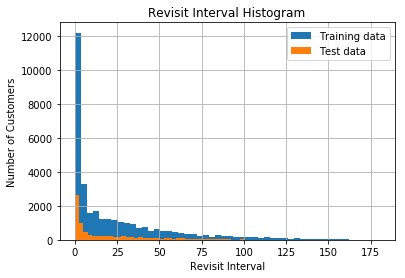

In [23]:
# Revisit interval - train data - among users who revisit
train_labels.revisit_interval.hist(bins=50)

# Revisit interval - test data - among users who revisit
test_labels.revisit_interval.hist(bins=50)

plt.xlabel('Revisit Interval')
plt.ylabel('Number of Customers')
plt.title('Revisit Interval Histogram')
plt.legend(['Training data','Test data'])

print('Mean revisit interval of training dataset is {:.3f}, test dataset is {:.3f}'.format(np.mean(train_labels.revisit_interval), np.mean(test_labels.revisit_interval)))

In [24]:
# relative date to actual date example
from datetime import date, timedelta

d0 = date(1970, 1, 1)
delta = 14141
print(d0+timedelta(days=17167))

2017-01-01


We only deal with the first visits for prediction, that's why the number of customers decrease. Otherwise, the dataset suffers from leakage.


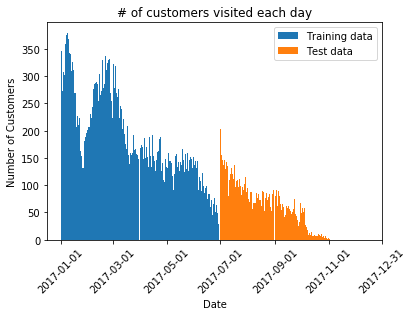

In [25]:
train_data = pd.concat([train_visits, train_labels[['revisit_interval','revisit_intention']]], axis=1)
train_data['date_str'] = train_data['date'].apply(lambda x: date(1970,1,1)+timedelta(days=x))
train_data1 = train_data[train_data.revisit_intention==1]
plt.hist(train_data1.date, bins=max(train_data.date)-min(train_data.date)+1)[2]
plt.title('# of customers visited each day');

test_data = pd.concat([test_visits, test_labels[['revisit_interval','revisit_intention']]], axis=1)
test_data1 = test_data[test_data.revisit_intention==1]
plt.hist(test_data1.date, bins=max(test_data.date)-min(test_data.date)+1)[2]
xdate = [17167,17226,17287,17348,17410,17471,17531]
xlabel = [date(1970,1,1)+timedelta(days=x) for x in xdate]
plt.xticks(xdate, xlabel, rotation='45')
plt.title('# of customers visited each day');
plt.xlabel('Date');
plt.ylabel('Number of Customers');
plt.legend(['Training data', 'Test data']);
print('We only deal with the first visits for prediction, that\'s why the number of customers decrease. Otherwise, the dataset suffers from leakage.')

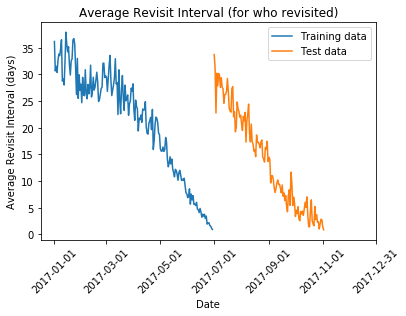

In [26]:
train_data1.groupby(['date'])['revisit_interval'].mean().plot()
test_data1.groupby(['date'])['revisit_interval'].mean().plot()

xdate = [17167,17226,17287,17348,17410,17471,17531]
xlabel = [date(1970,1,1)+timedelta(days=x) for x in xdate]
plt.xticks(xdate, xlabel, rotation='45')
plt.title('Average Revisit Interval (for who revisited)');
plt.xlabel('Date');
plt.ylabel('Average Revisit Interval (days)');
plt.legend(['Training data', 'Test data']);

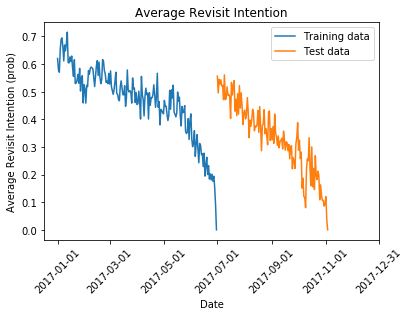

In [27]:
train_data.groupby(['date'])['revisit_intention'].mean().plot()
test_data.groupby(['date'])['revisit_intention'].mean().plot()

xdate = [17167,17226,17287,17348,17410,17471,17531]
xlabel = [date(1970,1,1)+timedelta(days=x) for x in xdate]
plt.xticks(xdate, xlabel, rotation='45')
plt.title('Average Revisit Intention');
plt.xlabel('Date');
plt.ylabel('Average Revisit Intention (prob)');
plt.legend(['Training data', 'Test data']);

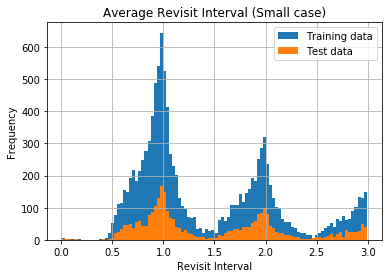

In [28]:
train_labels[train_labels.revisit_interval<3].revisit_interval.hist(bins=100)
test_labels[test_labels.revisit_interval<3].revisit_interval.hist(bins=100)
plt.title('Average Revisit Interval (Small case)');
plt.xlabel('Revisit Interval');
plt.ylabel('Frequency');
plt.legend(['Training data', 'Test data']);

In [29]:
# # Wifi session logs distribution by each month:
# #  - The number of logs from train period is larger than the number of logs from test period.
# #  - Since we only retain one indoor visit for each wifi-id in the test period.
# wifi_sessions.ts.hist(bins=12)

In [30]:
# Wifi session logs distribution by area
wifi_sessions.area.value_counts()

out                  353428
1f                   127151
in                   126206
2f                    82649
1f-promo              65082
1f-enter              57528
1f-must               42795
1f-counter            42111
1f-facial             41118
1f-perfume            35610
1f-facial-inner       34715
1f-getitbeauty        32872
2f-healt-care         30833
1f-nailstudio         29343
New-1f-natural        28900
1f-dermo-cosmetic     28582
2f-hairstudio         28499
1f-makeup             28299
2f-hair-care          28296
2f-femine-care        25543
1f-beauty-tools       24825
new-2f-food           24753
2f-enter              22050
2f-body-care          21035
2f-xtm                19568
2f-texfree            18817
2f-favorite           18658
1f-display            18010
2f-cafe               14873
2f-counter             8187
Name: area, dtype: int64

### 2. Feature generation

In [31]:
# In this tutorial, we will use a store_C dataset.      # /data: 50,000 user dataset  /data_sample: 500 user sample dataset
pre_release_path = '../data/indoor/store_C/'

# Load dataset
train_labels = pd.read_csv(pre_release_path+'train_labels.tsv', sep='\t')
test_labels = pd.read_csv(pre_release_path+'test_labels.tsv', sep='\t')
train_visits = pd.read_csv(pre_release_path+'train_visits.tsv', sep='\t')
test_visits = pd.read_csv(pre_release_path+'test_visits.tsv', sep='\t')
wifi_sessions = pd.read_csv(pre_release_path+'wifi_sessions.tsv', sep='\t')

wifi_sessions = wifi_sessions.set_index('index')

In [32]:
wifi_sessions

,wifi_id,ts,area,dwell_time
index,,,,
0,30332,1483200531,out,478
1,25302,1483223630,out,54
2,40733,1483224345,out,37
3,19000,1483224999,out,71
4,24203,1483225450,out,10
5,39054,1483225549,out,42
6,6987,1483226466,out,66
7,18558,1483226531,out,57
8,42095,1483226598,out,1287


In [33]:
### Before feature engineering, querying some useful information from wifi-sessions data, and add to the dataframe.
import time
def add_infos(df):  
    tst = time.time()
    df['l_index'] = df['indices'].apply(lambda x: [int(y) for y in x.split(';')])
    t1 = time.time()
    print(t1-tst)
    
    newidx = [item for sublist in list(df.l_index) for item in sublist]
    tmpdf = wifi_sessions.loc[newidx]
    traj_lens = df.l_index.apply(len)

    tmp_areas = list(tmpdf['area'])
    tmp_dt = list(tmpdf['dwell_time'])
    tmp_ts_end = list(np.array(tmpdf['ts'])+np.array(tmp_dt))  # end time
    
    rslt_dt = []
    rslt_areas = []
    rslt_ts_end = []
    
    i = 0
    for x in traj_lens:
        rslt_dt.append(tmp_dt[i:i+x])
        rslt_areas.append(tmp_areas[i:i+x])
        rslt_ts_end.append(max(tmp_ts_end[i:i+x]))
        i += x
        
    df['dwell_times'] = rslt_dt
    df['areas'] =  rslt_areas
    df['ts_end'] = rslt_ts_end
    
    t2 = time.time()
    print(t2-t1)
    return df 
    
##### Very slow approach, so revised.    
#     df['dwell_times'] = df['l_index'].apply(lambda x: [wifi_sessions.loc[idx]['dwell_time'] for idx in x])
#     t2 = time.time()
#     print(t2-t1)
#     df['areas'] = df['l_index'].apply(lambda x: [wifi_sessions.loc[idx]['area'] for idx in x])
#     t3 = time.time()
#     print(t3-t2)
    return df

In [34]:
train_visits = add_infos(train_visits)
test_visits = add_infos(test_visits)

0.35901498794555664
0.9118208885192871
0.15027284622192383
0.16053342819213867


In [35]:
train_visits.dwell_times.head(3)

0                    [93, 55, 36, 2, 9, 11, 346, 2, 5]
1    [534, 29, 495, 483, 432, 365, 354, 339, 304, 2...
2    [897, 736, 979, 1979, 1629, 1761, 1757, 684, 8...
Name: dwell_times, dtype: object

In [36]:
train_visits.head(3)

,visit_id,wifi_id,date,indices,l_index,dwell_times,areas,ts_end
0,v0,2,17208,312901;312922;312937;312957;312962;313032;3130...,"[312901, 312922, 312937, 312957, 312962, 31303...","[93, 55, 36, 2, 9, 11, 346, 2, 5]","[new-2f-food, 2f-texfree, 2f-femine-care, 2f-b...",1486816995
1,v1,3,17169,23563;23564;23575;23576;23587;23597;23600;2360...,"[23563, 23564, 23575, 23576, 23587, 23597, 236...","[534, 29, 495, 483, 432, 365, 354, 339, 304, 2...","[1f-enter, 1f-must, 1f-promo, New-1f-natural, ...",1483442127
2,v2,3,17211,336183;336206;336210;336222;336241;336286;3362...,"[336183, 336206, 336210, 336222, 336241, 33628...","[897, 736, 979, 1979, 1629, 1761, 1757, 684, 8...","[1f-must, 1f-enter, 1f-display, 1f-promo, New-...",1487065014


In [37]:
### Sample code to generate features 

def statistical_feature_generator(x):
    fs = []

    total_dwell_time = sum(x['dwell_times'])   # total dwell time
    num_area_trajectory_have = len(x['dwell_times'])  # the number of area
    num_unique_area_sensed = len(set(x['areas']))  # the number of unique areas
    
    fs.append(total_dwell_time)
    fs.append(num_area_trajectory_have)  
    fs.append(num_unique_area_sensed)     
    
    return fs


def add_statistical_features(train_visits):
    df = train_visits.copy()
    
    features = df.apply(lambda x: statistical_feature_generator(x), axis=1)
    featureName = ['total_dwell_time', 'num_area', 'num_unique_area']
    
    fdf = pd.DataFrame(list(np.asarray(features)), index=features.index, columns = featureName)
    
    # Combine feature values to the dataframe
    df = pd.concat([df, fdf], axis=1)
    del fdf
    
    return df

In [38]:
train_visits = add_statistical_features(train_visits)
test_visits = add_statistical_features(test_visits)

In [39]:
train_visits['date_rel'] = train_visits['date']-min(train_visits.date)
test_visits['date_rel'] = test_visits['date']-min(train_visits.date)

In [40]:
train_visits.head(3)

,visit_id,wifi_id,date,indices,l_index,dwell_times,areas,ts_end,total_dwell_time,num_area,num_unique_area,date_rel
0,v0,2,17208,312901;312922;312937;312957;312962;313032;3130...,"[312901, 312922, 312937, 312957, 312962, 31303...","[93, 55, 36, 2, 9, 11, 346, 2, 5]","[new-2f-food, 2f-texfree, 2f-femine-care, 2f-b...",1486816995,559,9,9,41
1,v1,3,17169,23563;23564;23575;23576;23587;23597;23600;2360...,"[23563, 23564, 23575, 23576, 23587, 23597, 236...","[534, 29, 495, 483, 432, 365, 354, 339, 304, 2...","[1f-enter, 1f-must, 1f-promo, New-1f-natural, ...",1483442127,3884,11,11,2
2,v2,3,17211,336183;336206;336210;336222;336241;336286;3362...,"[336183, 336206, 336210, 336222, 336241, 33628...","[897, 736, 979, 1979, 1629, 1761, 1757, 684, 8...","[1f-must, 1f-enter, 1f-display, 1f-promo, New-...",1487065014,12689,25,24,44


### 3. Revisit Prediction (Binary classification)

In [41]:
import time
import xgboost as xgb
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

def show_intention_classification_result(y_pred, y_test):
    return metrics.accuracy_score(y_test, y_pred)

def show_interval_regression_result(y_pred, y_test):
    return metrics.mean_squared_error(y_test, y_pred)

Downsampling for measuring binary classification accuracy

In [42]:
df_train = pd.concat([train_visits, train_labels[['revisit_intention','revisit_interval']]], axis=1)
df_test = pd.concat([test_visits, test_labels[['revisit_intention','revisit_interval']]], axis=1)

In [43]:
## Generate 'suppress_time' column for evaluation
def generate_suppress_time_col(df):
    last_ts_end = max(df['ts_end'])
    df['tmp_suppress_time'] = [(last_ts_end-x)/86400 for x in df['ts_end']]
    df['suppress_time'] = np.maximum(df['revisit_interval'].fillna(0), df['revisit_interval'].isnull()*df['tmp_suppress_time'])
    del df['tmp_suppress_time']
    return df
    
df_train = generate_suppress_time_col(df_train)
df_test = generate_suppress_time_col(df_test)

In [30]:
### Retain only feature values

def remove_unnecessary_features(df):
    unnecessary_attributes = ['visit_id', 'wifi_id', 'indices', 'l_index', 'dwell_times', 'areas', 'ts_end']
    all_attributes = list(df.columns)
    for attribute in unnecessary_attributes:
        try:
            all_attributes.remove(attribute)
        except:
            pass
    df = df[all_attributes]
    return df

df_train = remove_unnecessary_features(df_train)
df_test = remove_unnecessary_features(df_test)

In [31]:
def label_balancing(df, name_target_column):
    ## No downsampling
    return df
    
#     ## 1:1 Downsampling
#     minimum_label_num = list(df[name_target_column].value_counts())[-1]
    
#     df_list = []
#     for value in df[name_target_column].unique():
#         sub_dfs = df.loc[df[name_target_column] == value]
#         new_sub_dfs = sub_dfs.iloc[np.random.permutation(len(sub_dfs))][:minimum_label_num]  ## Random Downsampling according to smallest label size
#         df_list.append(new_sub_dfs)
#         del sub_dfs
        
#     new_df = pd.concat(df_list).sort_index()
    
#     return new_df

In [32]:
df_train.head(3)

,date,total_dwell_time,num_area,num_unique_area,date_rel,revisit_intention,revisit_interval,suppress_time
0,17250,861,3,3,83,1,39.10,39.10
1,17289,1224,3,3,122,1,4.95,4.95
2,17294,3261,5,5,127,1,0.66,0.66


In [33]:
1-sum(df_train.revisit_intention)/len(df_train.revisit_intention), 1-sum(df_test.revisit_intention)/len(df_test.revisit_intention)

(0.5183331907735296, 0.6201010195491534)

In [34]:
df_test['suppress_time'].head(5)

0    47.860000
1    75.028565
2     1.064664
3     3.560000
4    66.030000
Name: suppress_time, dtype: float64

In [35]:
import lifelines

print('-----------   Experiments Begin   -------------')
print()

clfs = [Pipeline([('classification', XGBClassifier(max_depth=5, learning_rate=0.1))]), 
                Pipeline([('regression', XGBRegressor(max_depth=5, learning_rate=0.1))]),
               ]

options = ['no_date', 'date']

rslt = {}
for opt in options:
    rslt[opt] = {}
    for clf in clfs:
        rslt[opt][clf] = {}
        rslt[opt][clf]['elapsed_time'] = []
        for metric in ['accuracy', 'precision_macro', 'recall_macro', 'fscore_macro', 'MSE', 'cindex']:
            rslt[opt][clf][metric] = []


## 나중에 더 정교화 (실제 cut-off point 가지고)
train_date_max = max(df_train.date)
test_date_max = max(df_test.date)
    
for i in range(2):
    for opt in ['no_date', 'date']:
        ## Making downsampled dataset for measuring binary classification accuracy - baseline = 0.5
        if opt == 'no_date':
            whole_balanced_train = label_balancing(df_train, 'revisit_intention')[df_train.columns.drop(['date','date_rel'])]
            whole_balanced_test = label_balancing(df_test, 'revisit_intention')[df_train.columns.drop(['date','date_rel'])]   
            
        if opt == 'date':
            whole_balanced_train = label_balancing(df_train, 'revisit_intention') 
            whole_balanced_test = label_balancing(df_test, 'revisit_intention')
    
        if (i == 0) and (opt == 'no_date'):
            print('Class label distribution after downsampling - Train data: revisit_intention 0: {}, 1: {}'.format(
                whole_balanced_train.revisit_intention.value_counts()[0],
                whole_balanced_train.revisit_intention.value_counts()[1]))
            print('Class label distribution after downsampling - Test data: revisit_intention 0: {}, 1: {}'.format(
                whole_balanced_test.revisit_intention.value_counts()[0],
                whole_balanced_test.revisit_intention.value_counts()[1]))


        for (train_data, test_data, ref) in [(whole_balanced_train, whole_balanced_test, 'Downsampled')]:
            train_array = np.asarray(train_data)  
            test_array = np.asarray(test_data)  

            for clf in clfs:
                if clf.steps[0][0] == 'classification':

                    # Dividing features and labels
                    X_train, y_train = train_array[:, :-3], train_array[:, -3].astype(int)
                    X_test, y_test = test_array[:, :-3], test_array[:, -3].astype(int)

                    # Training
                    start = time.time()
                    clf = clf.fit(X_train, y_train)

                    # Prediction
                    y_pred = clf.predict(X_test)

                    acc = metrics.accuracy_score(y_test, y_pred)
                    pm,rm,fm,_ = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')

                    rslt[opt][clf]['accuracy'].append(acc)
                    rslt[opt][clf]['precision_macro'].append(pm)
                    rslt[opt][clf]['recall_macro'].append(rm)
                    rslt[opt][clf]['fscore_macro'].append(fm)

                else:
                    # Dividing features and labels
                    X_train, y_train = train_array[:, :-3], train_array[:, -1]
                    X_test, y_test = test_array[:, :-3], test_array[:, -1]
                    y_test_bin = test_array[:,-3]
                    

                    # Training
                    start = time.time()
                    clf = clf.fit(X_train, y_train)

                    # Prediction
                    y_pred = clf.predict(X_test)
#                     mse = metrics.mean_squared_error(y_test, y_pred)

#                     y_test_max = max(y_test)
                    mse = metrics.mean_squared_error(y_test[y_test_bin == 1], y_pred[y_test_bin == 1])
                    
                    cindex = lifelines.utils.concordance_index(y_test, y_pred, event_observed= y_test_bin == 1 )

                    rslt[opt][clf]['MSE'].append(mse)
                    rslt[opt][clf]['cindex'].append(cindex)


                done = time.time()
                elapsed = done-start
                rslt[opt][clf]['elapsed_time'].append(elapsed)

print()
print('-----------   Performance of our model   -------------')
print()

    
for opt in options:
    print('Option: {}'.format(opt))
    for clf in clfs:
        for key in rslt[opt][clf].keys():
            if len(rslt[opt][clf][key]) > 0:
                print('Average {} (with {}): {:.4f}'.format(key, str(clf.steps[0][1])[:10], np.mean(rslt[opt][clf][key])))
    print()


-----------   Experiments Begin   -------------

Class label distribution after downsampling - Train data: revisit_intention 0: 36359, 1: 33787
Class label distribution after downsampling - Test data: revisit_intention 0: 13259, 1: 8123


/home/dmlab/ksedm1/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dmlab/ksedm1/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



-----------   Performance of our model   -------------

Option: no_date
Average elapsed_time (with XGBClassif): 3.2774
Average accuracy (with XGBClassif): 0.6047
Average precision_macro (with XGBClassif): 0.5694
Average recall_macro (with XGBClassif): 0.5633
Average fscore_macro (with XGBClassif): 0.5634
Average elapsed_time (with XGBRegress): 3.1292
Average MSE (with XGBRegress): 1931.9485
Average cindex (with XGBRegress): 0.5733

Option: date
Average elapsed_time (with XGBClassif): 3.4095
Average accuracy (with XGBClassif): 0.6201
Average precision_macro (with XGBClassif): 0.3101
Average recall_macro (with XGBClassif): 0.5000
Average fscore_macro (with XGBClassif): 0.3828
Average elapsed_time (with XGBRegress): 3.8624
Average MSE (with XGBRegress): 852.6013
Average cindex (with XGBRegress): 0.5397



In [36]:
whole_balanced_train.tail(3)

,date,total_dwell_time,num_area,num_unique_area,date_rel,revisit_intention,revisit_interval,suppress_time
70143,17320,678,6,6,153,0,NaN,27.107234
70144,17215,2062,4,3,48,1,86.8,86.800000
70145,17302,114,3,3,135,0,NaN,45.356609


In [37]:
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model
cph = CoxPHFitter()
# `event_col` refers to whether the 'death' events was observed: 1 if observed, 0 else (censored)
cph.fit(whole_balanced_train[whole_balanced_train.columns.drop(['revisit_interval'])], 
        'suppress_time', event_col='revisit_intention', show_progress=False)
cph.print_summary()

n=70146, number of events=33787

                    coef  exp(coef)  se(coef)       z      p  lower 0.95  upper 0.95     
date             -0.0419     0.9590 3330.9636 -0.0000 1.0000  -6528.6107   6528.5269     
total_dwell_time  0.0000     1.0000    0.0000  4.3593 0.0000      0.0000      0.0000  ***
num_area          0.0080     1.0081    0.0025  3.1626 0.0016      0.0030      0.0130   **
num_unique_area   0.0027     1.0027    0.0028  0.9532 0.3405     -0.0028      0.0081     
date_rel          0.0413     1.0422 3330.9636  0.0000 1.0000  -6528.5274   6528.6101     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.527
Likelihood ratio test = 552.896 on 5 df, p=0.00000


In [ ]:
test_pred = cph.predict_expectation(whole_balanced_test[whole_balanced_test.columns.drop(['revisit_interval','revisit_intention','suppress_time'])])
score_test = lifelines.utils.concordance_index(whole_balanced_test['suppress_time'], test_pred[0], event_observed=whole_balanced_test['revisit_intention'])
score_test

0.49857148231547277

In [ ]:
test_pred = cph.predict_median(whole_balanced_test[whole_balanced_test.columns.drop(['revisit_interval','revisit_intention','suppress_time'])])
score_test = lifelines.utils.concordance_index(whole_balanced_test['suppress_time'], test_pred[0.5], event_observed=whole_balanced_test['revisit_intention'])
score_test

In [ ]:
whole_balanced_test.head(3)   // 방문횟수같은 강한 feature 몇개 넣어보자.

In [ ]:
pd.concat([whole_balanced_test['suppress_time'], test_pred[0.5], whole_balanced_test['revisit_intention']],axis=1)